In [1]:
from sklearn import tree
import pandas as pd
import os

In [2]:
red = pd.read_csv('winequality-red.csv', delimiter=",")
white = pd.read_csv('winequality-white.csv', delimiter=",")

In [3]:
white['color'] = 0
red['color'] = 1

In [4]:
allwines = red.append(white, ignore_index=True)

In [5]:
allwines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [6]:
target = allwines["color"]
target_names = ["white", "red"]

In [7]:
data = allwines.drop("color", axis=1)
feature_names = data.columns
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [9]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9796923076923076

In [10]:
 from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9956923076923077

In [11]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.31674442788611257, 'total sulfur dioxide'),
 (0.2734062687027861, 'chlorides'),
 (0.08937979370783573, 'free sulfur dioxide'),
 (0.07863113134583735, 'density'),
 (0.07473248652710081, 'volatile acidity'),
 (0.04960227130363925, 'sulphates'),
 (0.03293183444081863, 'residual sugar'),
 (0.03269150691845683, 'fixed acidity'),
 (0.023181335819469028, 'citric acid'),
 (0.01699130304619124, 'pH'),
 (0.010039397500745536, 'alcohol'),
 (0.0016682428010067476, 'quality')]

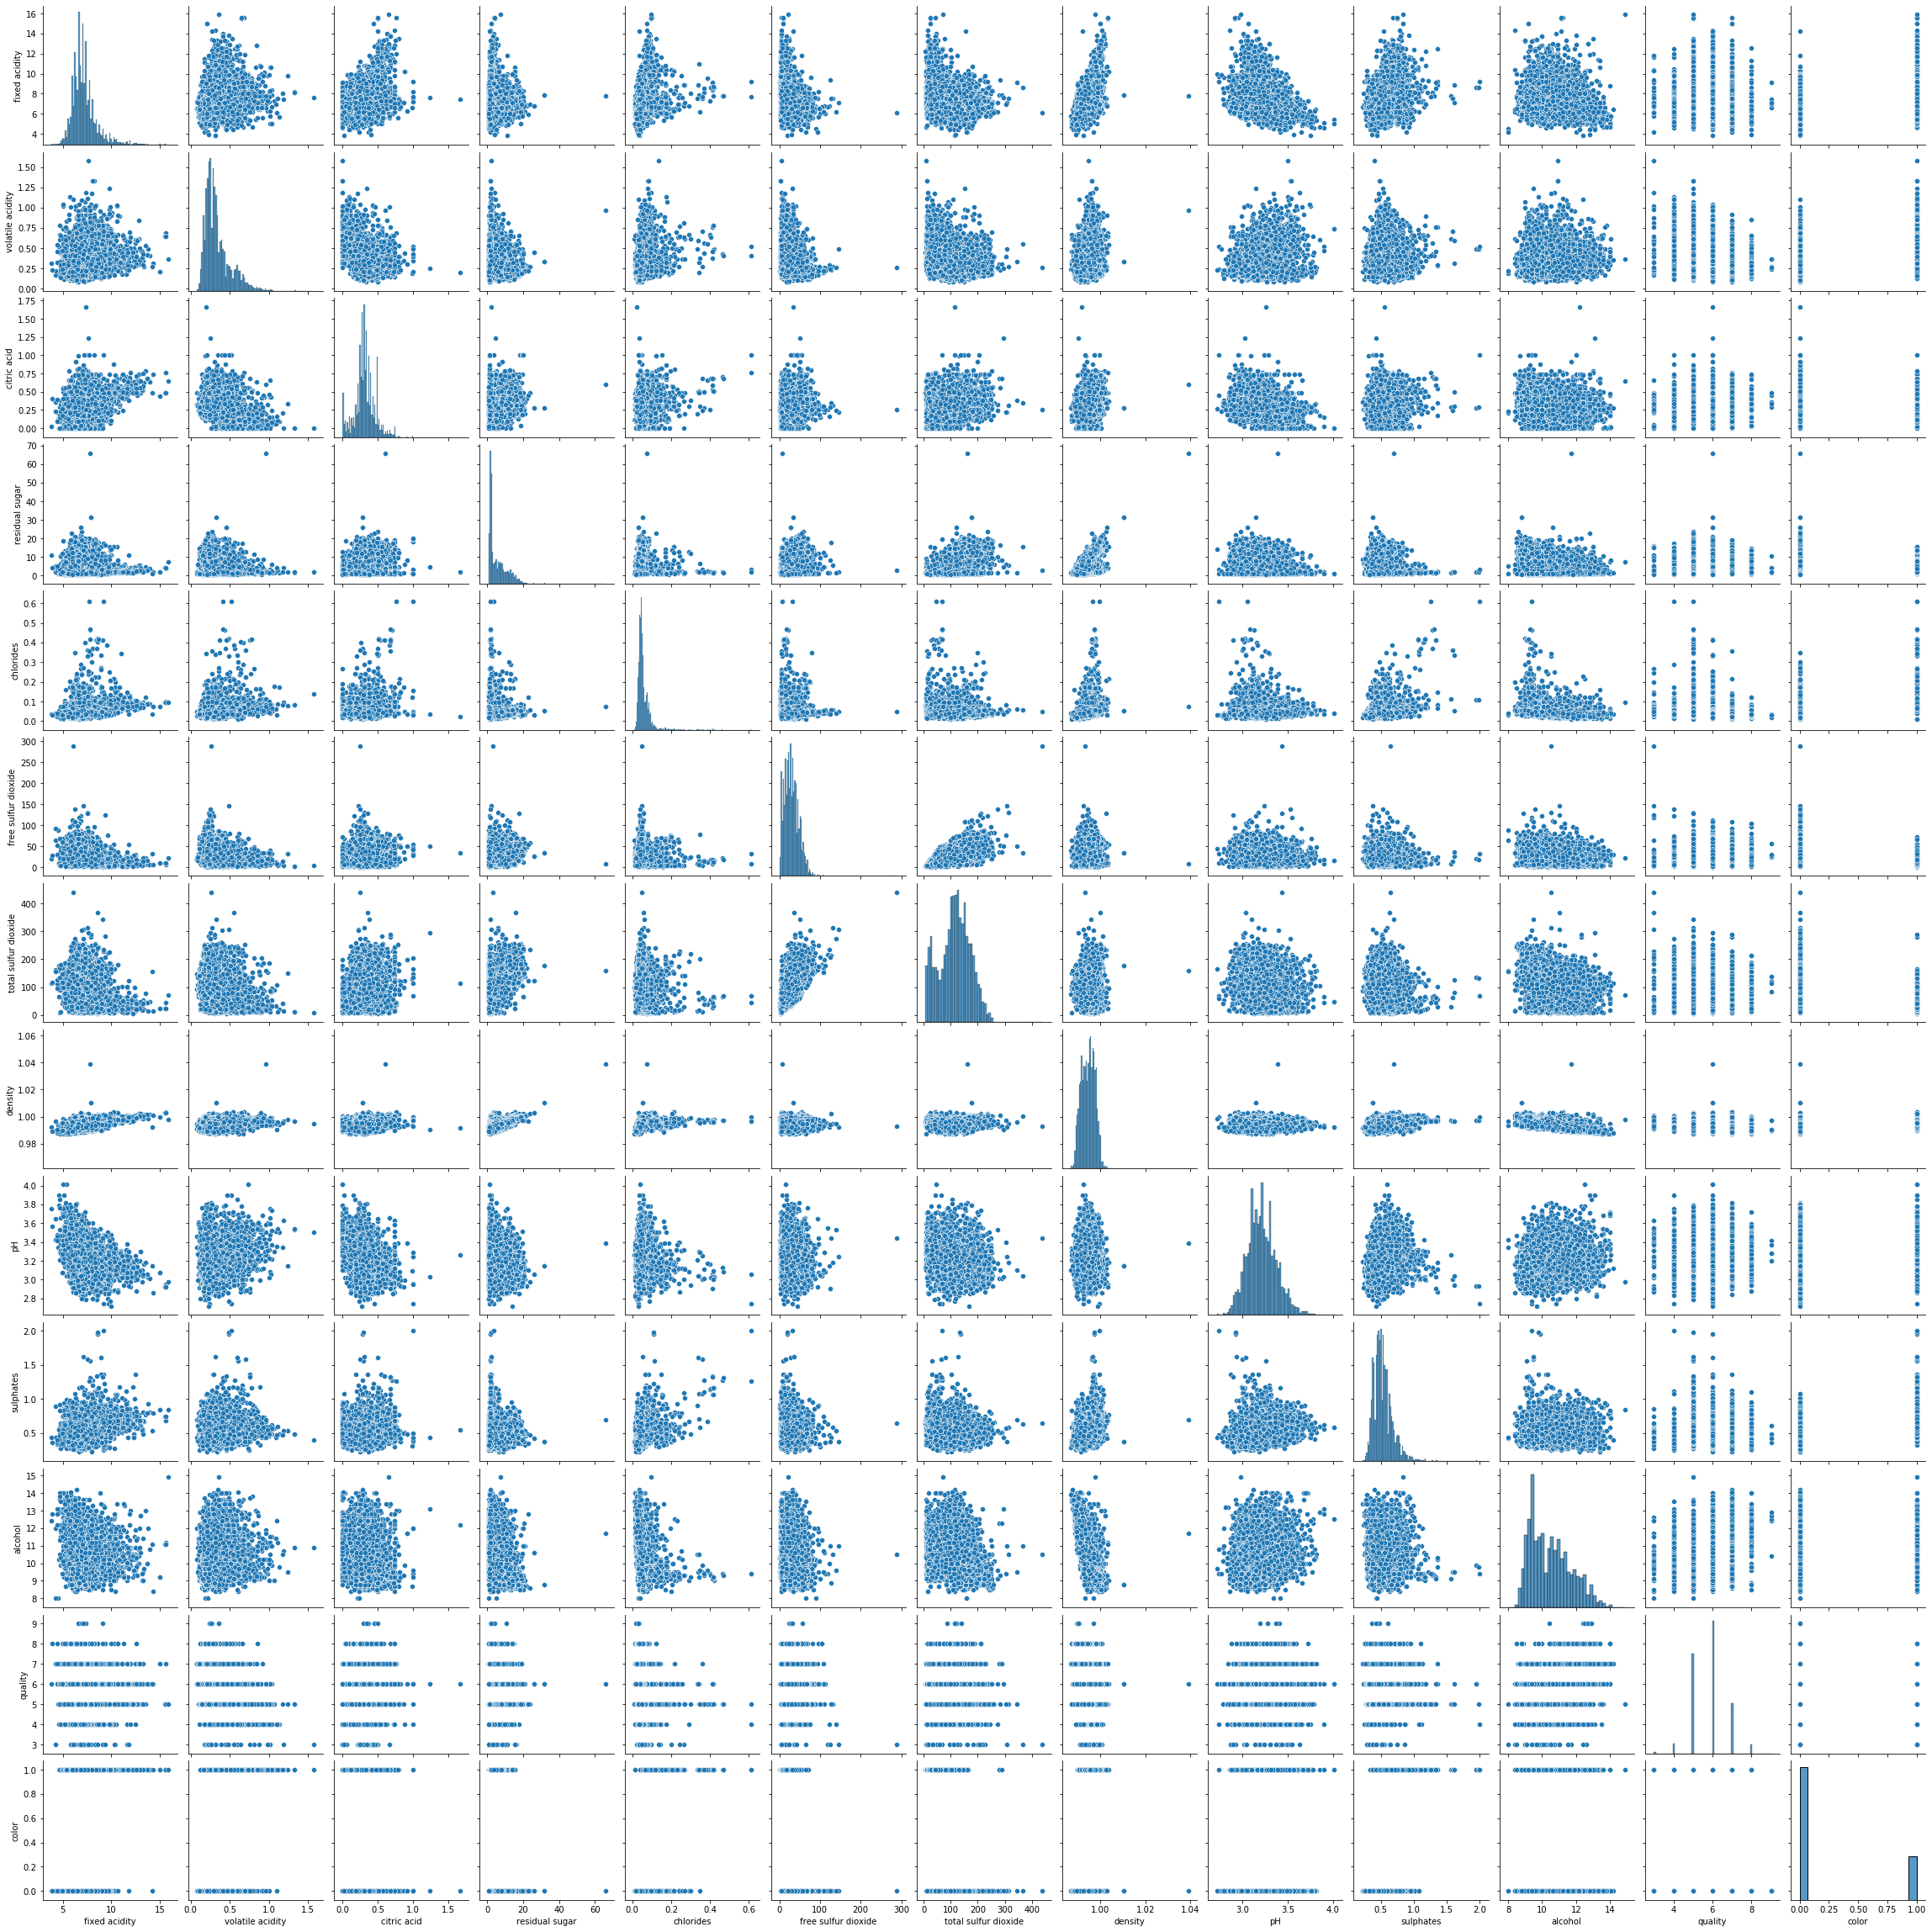

In [12]:
import seaborn as sns
sns.pairplot(allwines)

In [ ]:
# class probabilities for x
